In [7]:
from settings import *

import matplotlib.pyplot as plt
from collections import Counter
from data import *
from utils import *

In [8]:
trainset = MultiNERDDataset(lang='en', split='train', label_set=ALL_TAGS, max_len=72)
valset = MultiNERDDataset(lang='en', split='val', label_set=ALL_TAGS, max_len=72)


100%|██████████| 16410/16410 [00:17<00:00, 941.00it/s] 


In [9]:

def plot_token_distribution(dataset, max_len=128, interval=10):
    len_of_tokens = [len(i) for i in dataset.tokenized_tokens]

    # Create a distribution counter
    len_dis = Counter((min(l // interval * interval, max_len) for l in len_of_tokens))
    if any(l >= max_len for l in len_of_tokens):
        len_dis[max_len] = sum(l >= max_len for l in len_of_tokens)

    formatted_keys = [f"({k}, {k + interval})" if k < max_len else f"({max_len}, >)" for k in range(0, max_len, interval)]
    formatted_keys += [f"({max_len}, >)"] if max_len in len_dis else []

    # Calculate ratio distribution
    len_ratio_dis = {key: len_dis[int(key.split(',')[0][1:])] / len(len_of_tokens) for key in formatted_keys}

    print("Number of token distribution:")
    align_show_in_terminal(formatted_keys, [len_dis[int(key.split(',')[0][1:])] for key in formatted_keys], truncate=False)
    print("\nRatio distribution:")
    align_show_in_terminal(formatted_keys, [f"{len_ratio_dis[key]:.4f}" for key in formatted_keys], truncate=False)

    # Plotting
    plt.bar(len_ratio_dis.keys(), len_ratio_dis.values())
    plt.xlabel('Token Length Ranges')
    plt.ylabel('Frequency Ratio')
    plt.title('Token Length Distribution')
    plt.xticks(rotation=45)
    plt.show()

Number of token distribution:
(0, 10)        11699     
(10, 20)       53037     
(20, 30)       41201     
(30, 40)       16758     
(40, 50)       5782      
(50, 60)       1776      
(60, 70)       626       
(70, 80)       239       
(80, 90)       87        
(90, 100)      38        
(100, 110)     14        
(110, 120)     10        
(120, 130)     4         
(128, >)       9         

Ratio distribution:
(0, 10)        0.0891     
(10, 20)       0.4040     
(20, 30)       0.3138     
(30, 40)       0.1277     
(40, 50)       0.0440     
(50, 60)       0.0135     
(60, 70)       0.0048     
(70, 80)       0.0018     
(80, 90)       0.0007     
(90, 100)      0.0003     
(100, 110)     0.0001     
(110, 120)     0.0001     
(120, 130)     0.0000     
(128, >)       0.0001     


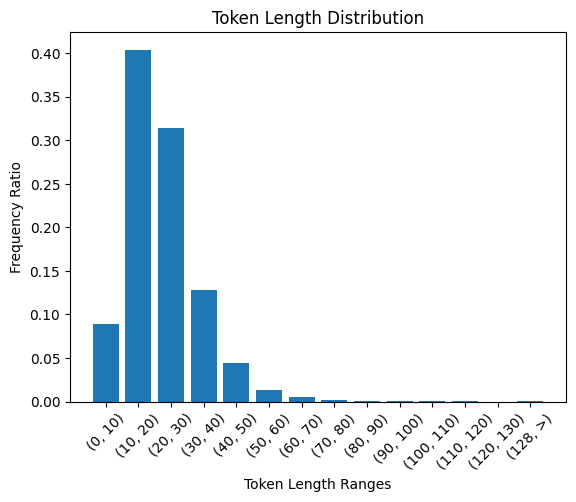

In [10]:
plot_token_distribution(trainset) 

Number of token distribution:
(0, 10)        834      
(10, 20)       6305     
(20, 30)       5539     
(30, 40)       2458     
(40, 50)       819      
(50, 60)       293      
(60, 70)       102      
(70, 80)       30       
(80, 90)       17       
(90, 100)      6        
(100, 110)     4        
(110, 120)     0        
(120, 130)     0        
(128, >)       3        

Ratio distribution:
(0, 10)        0.0508     
(10, 20)       0.3842     
(20, 30)       0.3375     
(30, 40)       0.1498     
(40, 50)       0.0499     
(50, 60)       0.0179     
(60, 70)       0.0062     
(70, 80)       0.0018     
(80, 90)       0.0010     
(90, 100)      0.0004     
(100, 110)     0.0002     
(110, 120)     0.0000     
(120, 130)     0.0000     
(128, >)       0.0002     


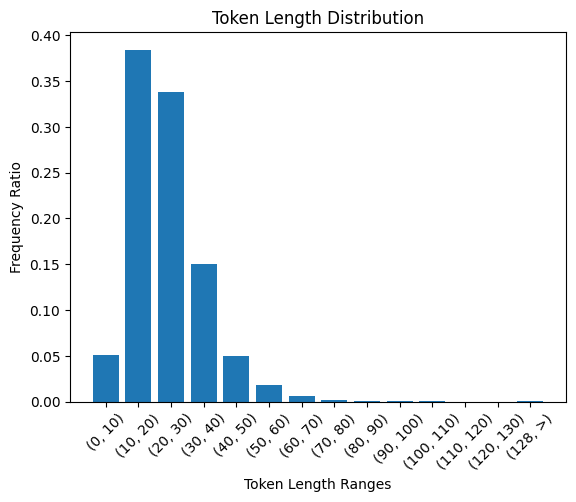

In [11]:
plot_token_distribution(valset) 